In [3]:
# Title: Customer Segmentation

# Task 1: An e-commerce company applies k-means clustering to segment customers based on purchase behavior. Run k-means on customer transaction history and interpret segments.
# Task 2: A retail store uses Gaussian Mixture Models (GMM) to identify customer segments that require different marketing strategies. Implement GMM and visualize the distinguished customer segments.
# Task 3: A travel agency leverages k-means clustering to understand customer preferences for various travel packages. Cluster customer preferences data to derive meaningful segmentations.

E-commerce Customer Segmentation with K=4 clusters:
   CustomerID  Recency  Frequency  Monetary  Cluster
0           1      103         49      1191        2
1           2      349         28      1860        0
2           3      271         32       773        0
3           4      107         27       274        0
4           5       72         20      4677        2

Cluster Characteristics (Average Values):
      Recency  Frequency     Monetary  Cluster
0  251.954198  31.351145  1136.274809        0
1  105.101695  10.296610  2466.610169        1
2  103.008000  36.720000  3142.976000        2
3  276.753968  20.976190  3765.071429        3


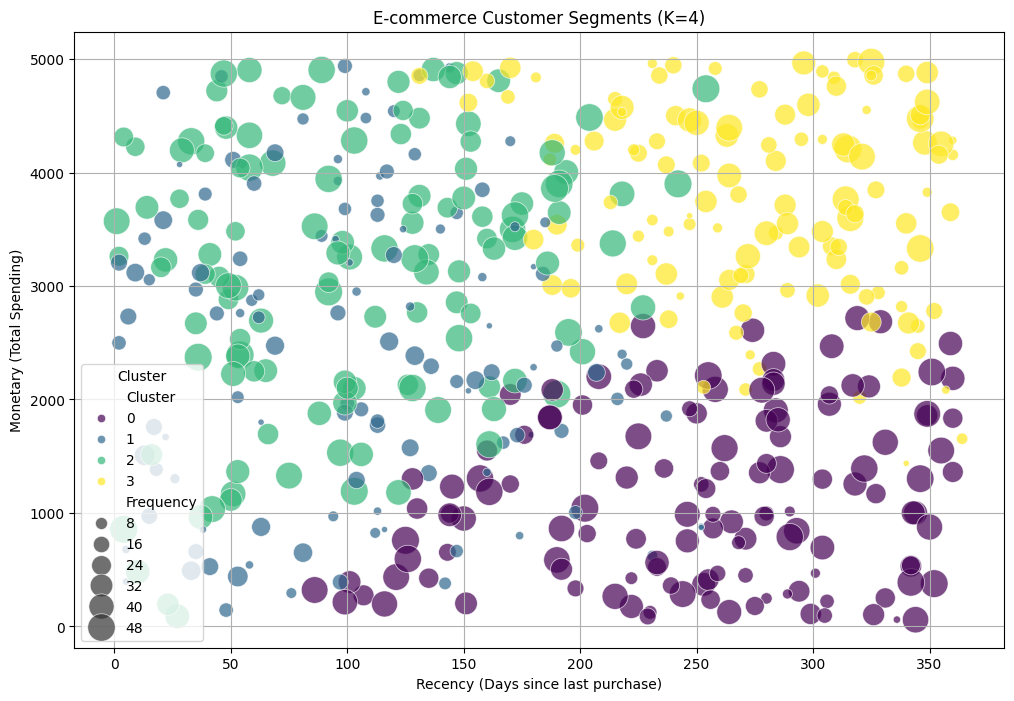

In [4]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

np.random.seed(42)
data_ecommerce = {
    'CustomerID': range(1, 501),
    'Recency': np.random.randint(1, 365, 500),
    'Frequency': np.random.randint(1, 50, 500),
    'Monetary': np.random.randint(50, 5000, 500)
}
df_ecommerce = pd.DataFrame(data_ecommerce)
df_ecommerce.to_csv('ecommerce_transactions.csv', index=False)

def segment_ecommerce_customers(file_path, n_clusters):
    df = pd.read_csv(file_path)
    features = ['Recency', 'Frequency', 'Monetary']
    X = df[features]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    df['Cluster'] = kmeans.fit_predict(X_scaled)
    print(f"E-commerce Customer Segmentation with K={n_clusters} clusters:")
    print(df.head())
    cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
    cluster_summary = pd.DataFrame(cluster_centers, columns=features)
    cluster_summary['Cluster'] = range(n_clusters)
    print("\nCluster Characteristics (Average Values):")
    print(cluster_summary)
    plt.figure(figsize=(12, 8))
    sns.scatterplot(x='Recency', y='Monetary', hue='Cluster', size='Frequency', sizes=(20, 400), data=df, palette='viridis', alpha=0.7)
    plt.title(f'E-commerce Customer Segments (K={n_clusters})')
    plt.xlabel('Recency (Days since last purchase)')
    plt.ylabel('Monetary (Total Spending)')
    plt.legend(title='Cluster')
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    segment_ecommerce_customers('ecommerce_transactions.csv', n_clusters=4)

Retail Customer Segmentation with GMM (Components=3):
   CustomerID  Avg_Items_Per_Purchase  Avg_Purchase_Value  Cluster
0           1                       6               18.11        1
1           2                       5               38.01        1
2           3                       6               50.10        0
3           4                       8               50.94        0
4           5                       5               41.00        1


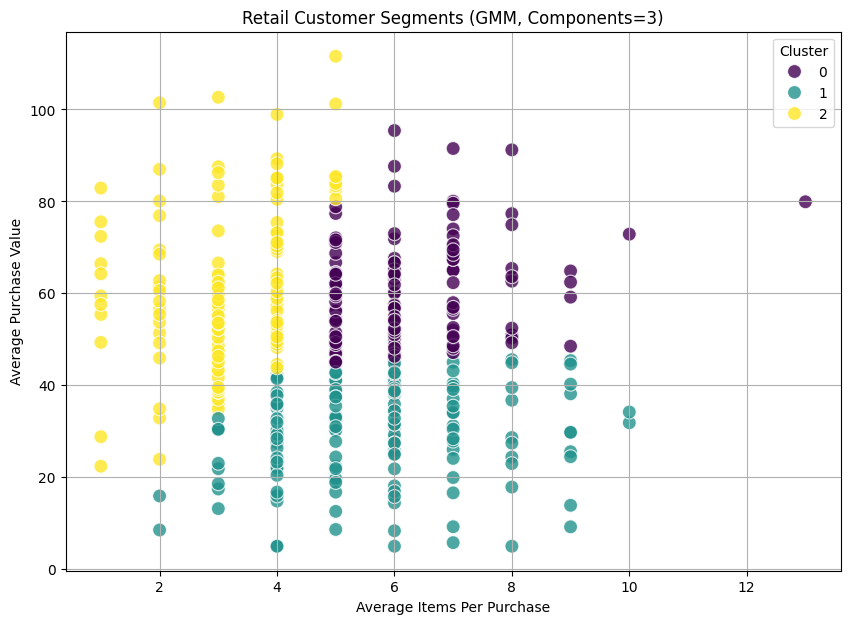

In [5]:
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

np.random.seed(42)
data_retail = {
    'CustomerID': range(1, 401),
    'Avg_Items_Per_Purchase': np.random.normal(loc=5, scale=2, size=400),
    'Avg_Purchase_Value': np.random.normal(loc=50, scale=20, size=400)
}
data_retail['Avg_Items_Per_Purchase'] = np.maximum(1, np.round(data_retail['Avg_Items_Per_Purchase'])).astype(int)
data_retail['Avg_Purchase_Value'] = np.maximum(5, np.round(data_retail['Avg_Purchase_Value'], 2))
df_retail = pd.DataFrame(data_retail)
df_retail.to_csv('retail_customer_data.csv', index=False)

def segment_retail_customers_gmm(file_path, n_components):
    df = pd.read_csv(file_path)
    features = ['Avg_Items_Per_Purchase', 'Avg_Purchase_Value']
    X = df[features]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    gmm = GaussianMixture(n_components=n_components, random_state=42, n_init=10)
    gmm.fit(X_scaled)
    df['Cluster'] = gmm.predict(X_scaled)
    print(f"Retail Customer Segmentation with GMM (Components={n_components}):")
    print(df.head())
    plt.figure(figsize=(10, 7))
    sns.scatterplot(x='Avg_Items_Per_Purchase', y='Avg_Purchase_Value', hue='Cluster', data=df, palette='viridis', s=100, alpha=0.8)
    plt.title(f'Retail Customer Segments (GMM, Components={n_components})')
    plt.xlabel('Average Items Per Purchase')
    plt.ylabel('Average Purchase Value')
    plt.legend(title='Cluster')
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    segment_retail_customers_gmm('retail_customer_data.csv', n_components=3)

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

np.random.seed(42)
data_travel = {
    'CustomerID': range(1, 301),
    'Adventure_Score': np.random.randint(1, 11, 300),
    'Relaxation_Score': np.random.randint(1, 11, 300),
    'Culture_Score': np.random.randint(1, 11, 300),
    'Budget_Score': np.random.randint(1, 11, 300)
}
df_travel = pd.DataFrame(data_travel)
df_travel.to_csv('travel_preferences.csv', index=False)

def segment_travel_customers(file_path, n_clusters):
    df = pd.read_csv(file_path)
    features = ['Adventure_Score', 'Relaxation_Score', 'Culture_Score', 'Budget_Score']
    X = df[features]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    df['Cluster'] = kmeans.fit_predict(X_scaled)
    print(f"Travel Agency Customer Segmentation with K={n_clusters} clusters:")
    print(df.head())
    cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
    cluster_summary = pd.DataFrame(cluster_centers, columns=features)
    cluster_summary['Cluster'] = range(n_clusters)
    print("\nCluster Characteristics (Average Preference Scores):")
    print(cluster_summary)
    if len(features) >= 3:
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
        scatter = ax.scatter(df['Adventure_Score'], df['Relaxation_Score'], df['Culture_Score'], c=df['Cluster'], cmap='viridis', s=60, alpha=0.8)
        ax.set_xlabel('Adventure Score')
        ax.set_ylabel('Relaxation Score')
        ax.set_zlabel('Culture Score')
        plt.title(f'Travel Customer Segments (K={n_clusters})')
        plt.colorbar(scatter, ax=ax, label='Cluster')
        plt.show()
    else:
        print("Not enough features for 3D plot. Consider plotting 2D projections if needed.")

if __name__ == "__main__":
    segment_travel_customers('travel_preferences.csv', n_clusters=3)